<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.4: Regularisation

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [2]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn

diabetes = datasets.load_diabetes()

In [3]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [5]:
# Target
y = diabetes.target

#### 1.2 Create a Base Model Using Linear Regression

not splitting to training and test  - new concept, just making the task simple - should technically split the data

In [6]:
# Create Model
model = LinearRegression()

In [7]:
# Fit
model.fit(X,y)

LinearRegression()

In [8]:
# Score
model.score(X,y)

0.5177494254132934

In [9]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

-10 is matched to age, -239 is matched to sex etc.

In [10]:
# Check Coefficient
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

to view in a data frame how -10 is matched to age etc.

In [11]:
pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})

,variable,coef,abs_coef
0,age,-10.012198,10.012198
1,sex,-239.819089,239.819089
2,bmi,519.839787,519.839787
3,bp,324.390428,324.390428
4,s1,-792.184162,792.184162
5,s2,476.745838,476.745838
6,s3,101.044570,101.044570
7,s4,177.064176,177.064176
8,s5,751.279321,751.279321
9,s6,67.625386,67.625386


In [12]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

s1 has the most relationship followed by s5

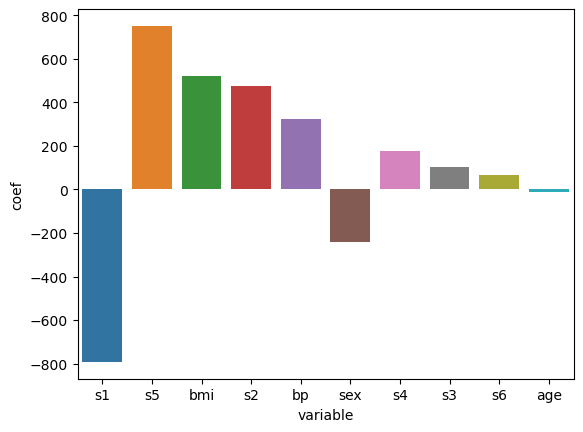

In [13]:
# Plot Coefficients
view_coeff(X, model)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

Alpha is how much we want to penalise the model - as you increase the power of alpha, you're making the coefficient decrease / penalising it 

In [14]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors. errors gets the mean sqd errors and appends it to the errors list
coefs = []
errors = []

# create a range of alphas to calculate. start at 6, stop at -6, get 200 values
ridge_alphas = np.logspace(-6, 6, 200) 

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

In [15]:
#range of alphas to calculate. start at 6, stop at -6, get 200 values
np.logspace(-6,6,200)

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-05, 2.12145178e-05, 2.43744415e-05,
       2.80050389e-05, 3.21764175e-05, 3.69691271e-05, 4.24757155e-05,
       4.88025158e-05, 5.60716994e-05, 6.44236351e-05, 7.40196000e-05,
       8.50448934e-05, 9.77124154e-05, 1.12266777e-04, 1.28989026e-04,
       1.48202071e-04, 1.70276917e-04, 1.95639834e-04, 2.24780583e-04,
       2.58261876e-04, 2.96730241e-04, 3.40928507e-04, 3.91710149e-04,
       4.50055768e-04, 5.17092024e-04, 5.94113398e-04, 6.82607183e-04,
       7.84282206e-04, 9.01101825e-04, 1.03532184e-03, 1.18953407e-03,
       1.36671636e-03, 1.57029012e-03, 1.80418641e-03, 2.07292178e-03,
      

In [96]:
len(coefs)

200

##### 1.3.2 Visual Representation of Coefficient of Ridge Model

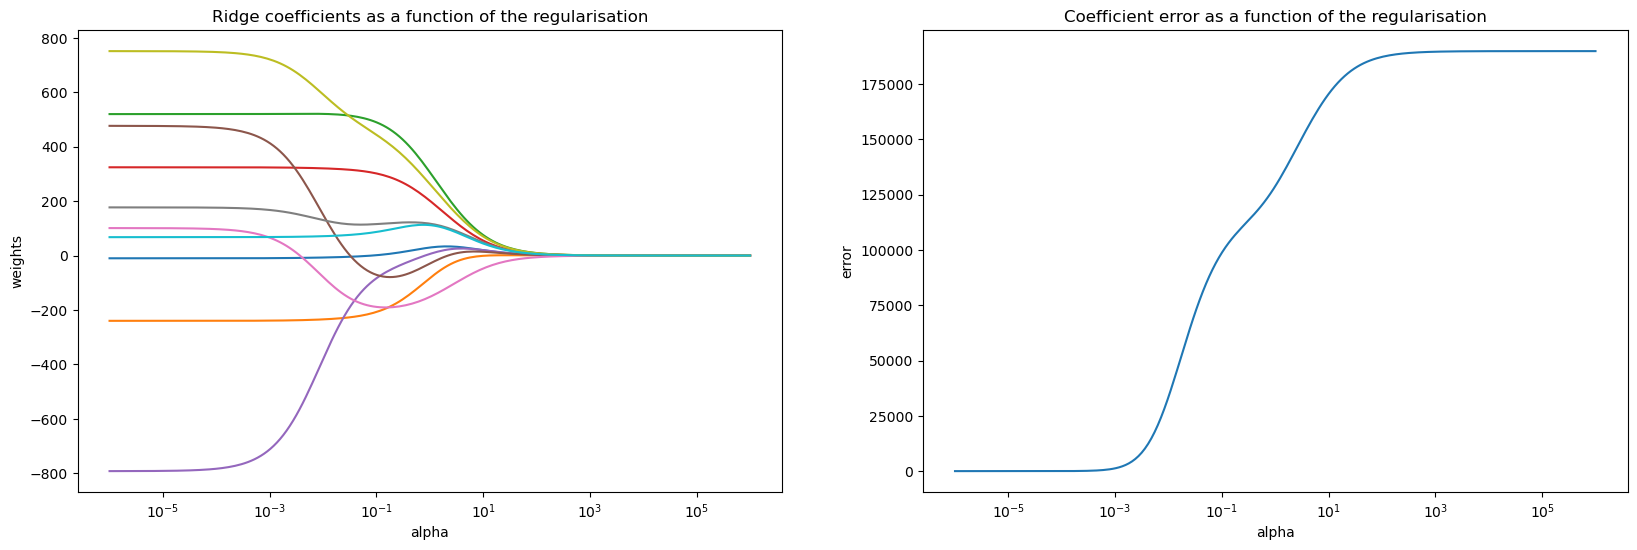

In [16]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

2nd graph is the error - starts small increaes to 175k

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

will give you the best alpha to get the best score

cv=10 - splitting each data point for test set - below splits 10 times

In [17]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138362231730856


In [18]:
optimal_ridge.alpha_

0.06669919663030115

In [19]:
optimal_ridge.score(X,y)

0.5138362231730856

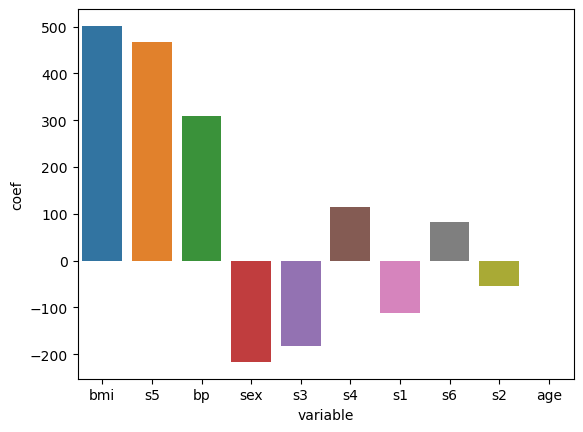

In [20]:
view_coeff(X, optimal_ridge)

after applying regularisation, bmi is ranked 1 and s5 is still second - S1 is no longer the most important 

In [21]:
optimal_ridge.coef_

array([  -1.26622748, -216.39721987,  501.54525196,  308.13830635,
       -112.18436538,  -54.47321543, -182.3039618 ,  114.03193475,
        466.75533041,   81.94317741])

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [22]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
clf = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs=[]
errors=[]

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

In [23]:
clf.set_params(alpha=0.5)
clf.fit(X,y)
clf.coef_

array([  0.        ,  -0.        , 471.03873321, 136.50710814,
        -0.        ,  -0.        , -58.3195488 ,   0.        ,
       408.02332435,   0.        ])

In [24]:
clf.set_params(alpha=1)
clf.fit(X,y)
clf.coef_

array([  0.        ,  -0.        , 367.70185207,   6.30190419,
         0.        ,   0.        ,  -0.        ,   0.        ,
       307.6057    ,   0.        ])

In [25]:
clf.set_params(alpha=10)
clf.fit(X,y)
clf.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

at 10 it zero's them all out. at 1 there are only 3 features. at 0.5 there are 4 features. don't need to keep trying to find the right one though, doing lasso_alphas with cv=10 will give you the best alpha to use

##### 1.4.2 Visual Representation of Coefficient of Lasso Model

Hint: Same as Ridge

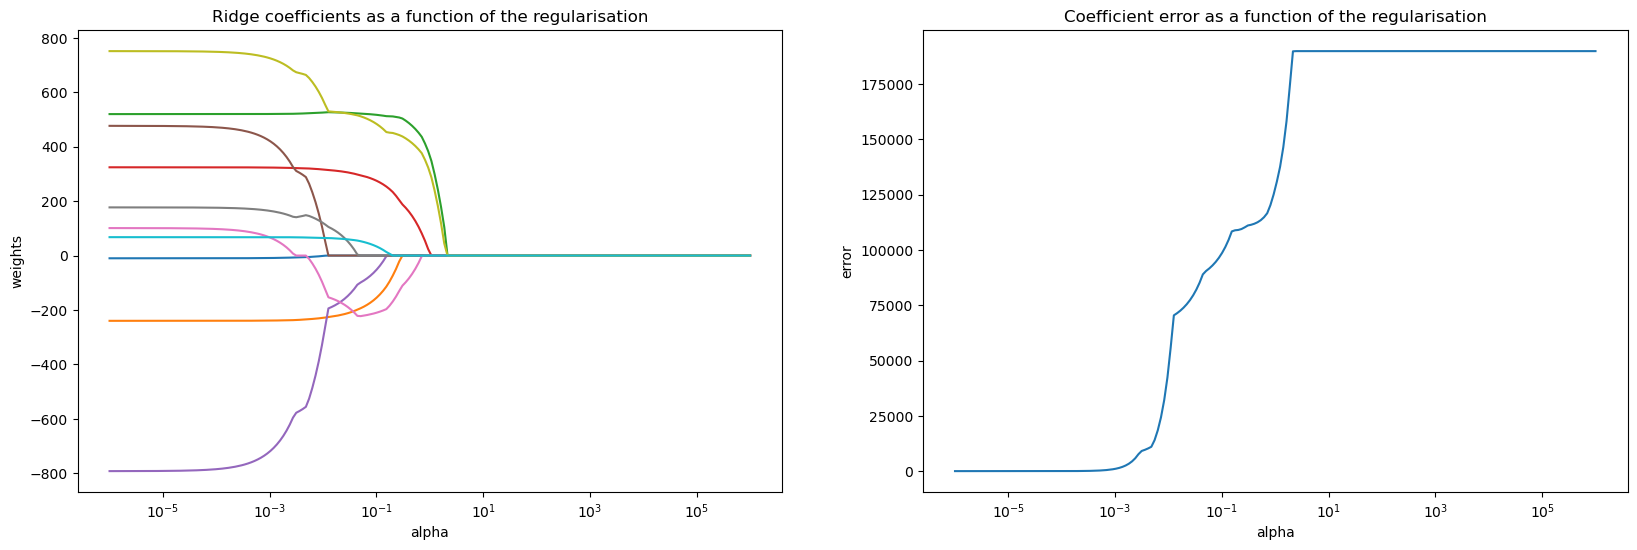

In [26]:
# Display results

# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.3. [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [27]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.05805225516094896
Score: 0.512648775957248


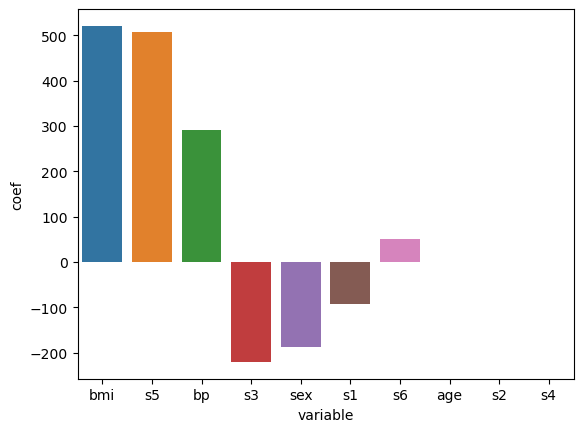

In [28]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [29]:
# Build the ridge and lasso using optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge
ridge.fit(X, y)
lasso.fit(X, y)

Lasso(alpha=0.05805225516094896)

In [30]:
# model residuals:

ridge_resid = y - ridge.predict(X)
lasso_resid = y - lasso.predict(X)

unable to do the jointplots together - get an error saying can't have 2 arguments 

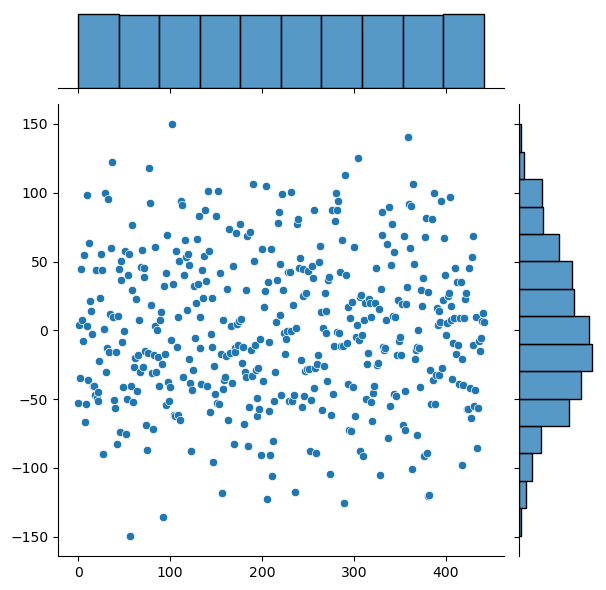

In [31]:
sns.jointplot(lasso_resid);

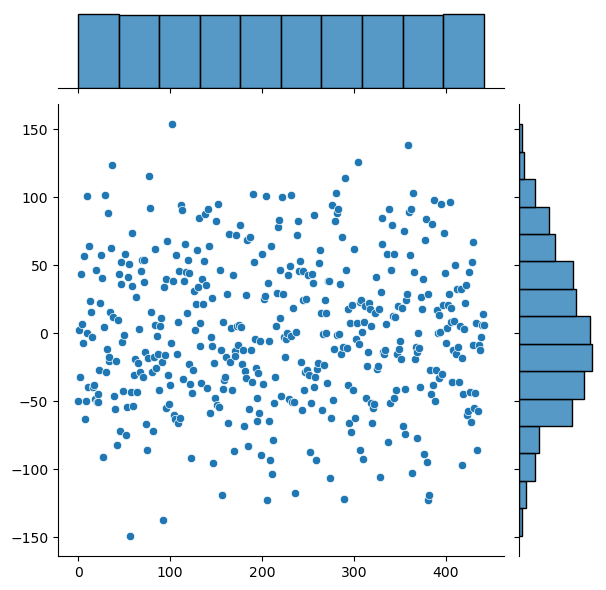

In [114]:
sns.jointplot(ridge_resid);



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



